# **EDA**

In [1]:
#Importamos las librerías necesarías para el análisis exploratorio de datos:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('car_price.csv')

## **1. Análisis General**

### **1.1 Vistazo General**

In [3]:
df.describe()

,year,kms,power,price,dealer_zip_code
count,42355.000000,4.235500e+04,42355.000000,42355.000000,42355.000000
mean,2016.688183,8.641526e+04,152.095597,19320.282729,24565.356085
std,3.977171,5.620448e+04,1752.963259,16203.775595,14623.304167
min,1967.000000,0.000000e+00,0.000000,0.000000,1002.000000
25%,2015.000000,4.400000e+04,102.000000,12089.000000,8734.000000
50%,2018.000000,8.079900e+04,126.000000,16290.000000,28230.000000
75%,2019.000000,1.167120e+05,150.000000,22500.000000,36211.000000
max,2023.000000,1.330000e+06,360571.000000,498000.000000,50820.000000


Encontramos que la potencia ,más baja de un vehículo es 0, esto no puede ser así que haremos un repaso a los valores de potencia y intentaremos arreglar estos valores.
También valores de más de 600.000 kms no son plausibles así.

#### **1.1.1 - Arreglo de valores raros de potencia**

In [26]:
potencias_sin_sentido = df[df['power']<=50][['make','model','year','price','power']].sort_values(by='price',ascending=False)

print('Cantidad de autos con potencias sin sentido:',len(potencias_sin_sentido))    

print(potencias_sin_sentido[['make','model','power','price','year']].value_counts())

Cantidad de autos con potencias sin sentido: 9
make        model     power  price  year
Citroen     AMI       8.0    6789   2023    1
                             7289   2023    1
                             7589   2023    1
Dacia       Spring    45.0   21290  2022    1
Jeep        Wrangler  0.0    26500  2006    1
Renault     Twizy     5.0    7500   2017    1
                      11.0   6990   2017    1
                      17.0   7377   2018    1
Volkswagen  Lupo      50.0   1800   2000    1
Name: count, dtype: int64


In [18]:
#El citroen AMI está bien, es un auto eléctrico con 8CV de potencia.
#El Dacia Spring también está bien, es un auto eléctrico con 44CV de potencia.  
#El Renault Twizy también está bien, es un auto eléctrico con 17CV de potencia.
#El Volkswagen Lupo también está bien, es un auto que tenía una versión de 50CV.


In [8]:
# Veamos de los modelos con potencia baja cuantos hay de cada uno en el dataset
resultados = pd.DataFrame(columns=['make', 'model', 'count'])

# Bucle
for index, row in potencias_sin_sentido.iterrows():
    make = row['make']
    model = row['model']
    count = df[(df['make'] == make) & (df['model'] == model)].shape[0]
    resultados = pd.concat([resultados, pd.DataFrame({'make': [make], 'model': [model], 'count': [count]})], ignore_index=True)

print(resultados)

          make     model count
0       Alpine      A110     9
1        Tesla   Model S    16
2        Tesla   Model S    16
3         Jeep  Wrangler    71
4        Dacia    Spring     1
5      Citroen  Berlingo  2234
6      Citroen       AMI     3
7      Renault     Twizy     3
8      Renault     Twizy     3
9      Citroen       AMI     3
10     Renault     Twizy     3
11     Citroen       AMI     3
12  Volkswagen      Lupo     5


In [14]:
#De Alpine A110 hay 3 autos, miraremos que potencia tienen en el dataset general
alpine = df[(df['make'] == 'Alpine') & (df['model'] == 'A110')]
alpine[['price','power']].value_counts()    

price  power
73490  292.0    2
61900  292.0    1
64000  252.0    1
       292.0    1
68000  252.0    1
       292.0    1
77000  0.0      1
79990  292.0    1
Name: count, dtype: int64

In [17]:
#Al costar más quie los demás será la versión más potente del modelo de 292cv, entonces le pondremos ese valor
df.loc[(df['make'] == 'Alpine') & (df['model'] == 'A110') & (df['power'] <= 50), 'power'] = 292

In [21]:
#La citroen berlingo le pondremos 75 cv que es el mínimo de potencia que tiene
df.loc[(df['make'] == 'Citroen') & (df['model'] == 'Berlingo') & (df['power'] <= 50), 'power'] = 75

In [24]:
# De Tesla Model S hay varios autos, miraremos qué potencia tienen en el dataset general
tesla_model_s = df[(df['make'] == 'Tesla') & (df['model'] == 'Model S')]
tesla_model_s[['price', 'power','kms']].value_counts()


price   power  kms     
38490   367.0  204700.0    1
39900   421.0  190000.0    1
39990   421.0  130000.0    1
41900   421.0  192900.0    1
43990   388.0  90984.0     1
48990   740.0  133500.0    1
56880   770.0  119700.0    1
56900   770.0  119700.0    1
58900   0.0    87000.0     1
58990   333.0  89831.0     1
59900   0.0    87000.0     1
61990   473.0  45000.0     1
78500   816.0  45920.0     1
87890   796.0  29743.0     1
89890   796.0  29743.0     1
149990  999.0  3046.0      1
Name: count, dtype: int64

In [25]:
#De tesla Model S es dificil predecir cual será la potencia ya que hay muchos valores distintos, así que borraremos las filas con potencia 0
df = df.drop(df[(df['make'] == 'Tesla') & (df['model'] == 'Model S') & (df['power'] <= 50)].index)

In [27]:
# De Jeep Wrangler hay varios autos, miraremos qué potencia tienen en el dataset general
jeep_wrangler = df[(df['make'] == 'Jeep') & (df['model'] == 'Wrangler')]
jeep_wrangler[['price', 'power', 'kms']].value_counts()


price  power  kms     
37900  200.0  79072.0     33
66500  200.0  29620.0     19
34990  200.0  103530.0     6
23990  177.0  120000.0     1
26500  0.0    100000.0     1
28500  200.0  129000.0     1
28900  200.0  135000.0     1
28999  177.0  75000.0      1
47900  272.0  56000.0      1
49990  272.0  70000.0      1
57900  272.0  7500.0       1
59990  200.0  60000.0      1
62900  380.0  2000.0       1
              2700.0       1
64990  200.0  95000.0      1
69900  381.0  15558.0      1
Name: count, dtype: int64

In [28]:
#El jeep wrangler que tenemos con 0 caballos, por precio se acerca a la versión mínima de nuetsro dataset de 177cv, así que le pondremos ese valor  
df.loc[(df['make'] == 'Jeep') & (df['model'] == 'Wrangler') & (df['power'] <= 50), 'power'] = 177

In [44]:
#Veamos que marca, modelo y precio tiene el coche cocn el valor de potencia maximo
max_power = df[df['power'] == df['power'].max()][['make','model','version','price','power','kms','year']]
print(max_power)

       make model                       version  price     power       kms  \
17141  Audi    S8  4.0 TFSI 571 quattro 4p tip.   6000  360571.0  250000.0   

       year  
17141  2000  


In [47]:
# Es imposible que un coche tenga 36k cv de potencia, por muy audi s8 que sea, con esas características y buscando en internet, el modelo ronda los 340cv, así que le pondremos ese valor
df.loc[(df['make'] == 'Audi') & (df['model'] == 'S8') & (df['power'] == 360571.0), 'power'] = 340

#### **1.1.2 - Valores elevados de kilometraje**

In [32]:
#Vemos que precio tienen los autos con kilometraje superior a 600000
df[df['kms'] > 600000][['make','model','year','price','power','kms']].sort_values(by='price',ascending=False)

,make,model,year,price,power,kms
34661,Citroen,C5,2011,13499,140.0,1330000.0
5237,Fiat,Ducato,2016,12900,177.0,970000.0
19216,Renault,Clio,2018,10790,75.0,932781.0
19217,Renault,Clio,2018,10390,75.0,932781.0
5238,Fiat,Ducato,2013,9500,180.0,750000.0
16397,Volkswagen,Golf Plus,2006,6990,115.0,740000.0
691,Nissan,Atleon,2008,6950,150.0,649000.0
9854,Iveco,Daily,2010,6655,146.0,721000.0


In [33]:
#eliminamos las filas dce vehículos con más de 600000 km
df = df.drop(df[df['kms'] > 600000].index)

### **1.2 - Histogramas y Boxplots**

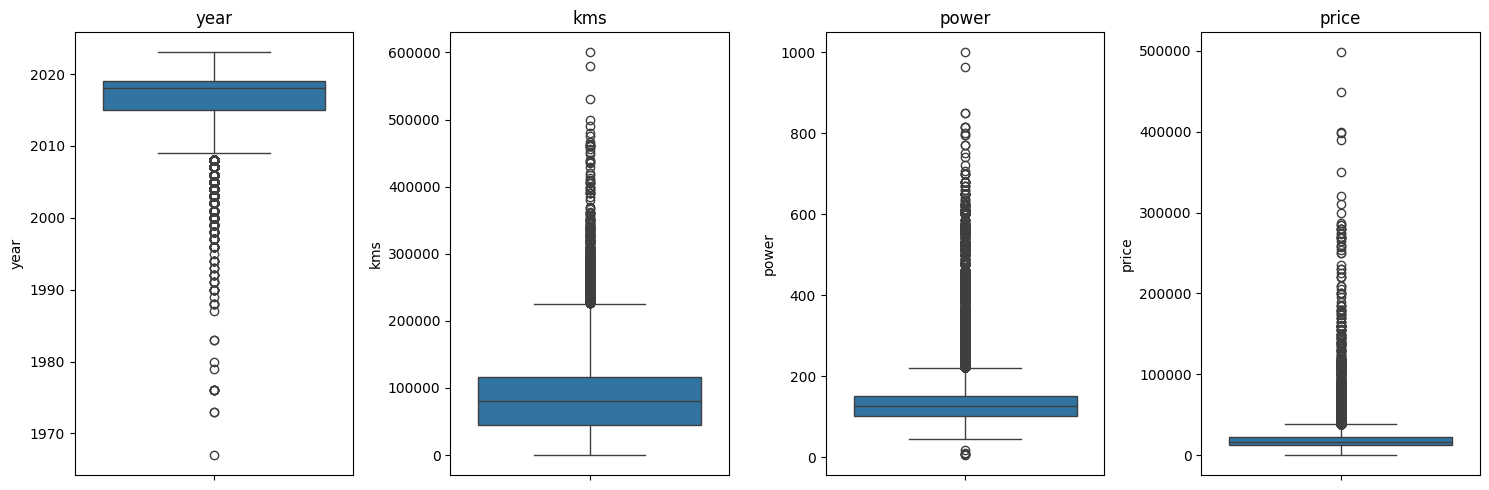

In [48]:
# Excluir la variable 'dealer_zip_code'
num_vars = df.select_dtypes(include=['float64', 'int64']).columns.drop('dealer_zip_code')

# Configurar la figura y los subplots
n_cols = 4  # Número de columnas en la cuadrícula
n_rows = 1  # Número de filas en la cuadrícula

plt.figure(figsize=(15, n_rows * 5))  # Ajustar el tamaño de la figura

# Iterar sobre las variables numéricas
for i, var in enumerate(num_vars):
    plt.subplot(n_rows, n_cols, i + 1)  # Crear un subplot
    sns.boxplot(y=df[var])  # Crear el boxplot para la variable
    plt.title(var)  # Título del gráfico
    plt.xlabel('')  # Quitar etiqueta del eje x para claridad

plt.tight_layout()  # Ajustar diseño
plt.show()

In [6]:
min_year = df['year'].min()
print(f"El valor mínimo de year en df es: {min_year}")

El valor mínimo de year en df es: 1967


Observamos que la mayoría de los coches se encuentran entre los años 2010 y superior a 2020 por poco. Encontramos algunos modelos de muchos años siendo el más antiguo de 1967.

### **1.1.1 - Análisis de los vehículos más costosos**

In [8]:
# Calculamos el rango intercuartílico (IQR) para la variable 'price'
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Definimos los límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtramos el dataframe según los rangos definidos y lo guardamos en una nueva variable
outliers_df = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]


In [15]:
#Descripción de los datos del dataframe de coches costosos
print(outliers_df.describe())
cantidad_outliers = outliers_df.shape[0]   # Número de filas en el dataframe de outliers
print(f"El número de outliers en el dataframe es: {cantidad_outliers}")

              year            kms        power          price  dealer_zip_code
count  2626.000000    2626.000000  2626.000000    2626.000000      2626.000000
mean   2018.067022   54305.263138   335.654227   62665.200305     24433.402133
std       4.446688   43049.315830   137.639816   36691.383267     14320.802153
min    1967.000000       0.000000     0.000000   38300.000000      1007.000000
25%    2017.000000   22000.000000   204.000000   43990.000000      8734.000000
50%    2019.000000   40103.000000   320.000000   51990.000000     28230.000000
75%    2021.000000   83489.000000   436.000000   67655.000000     30005.000000
max    2023.000000  250000.000000   999.000000  498000.000000     50820.000000
El número de outliers en el dataframe es: 2626


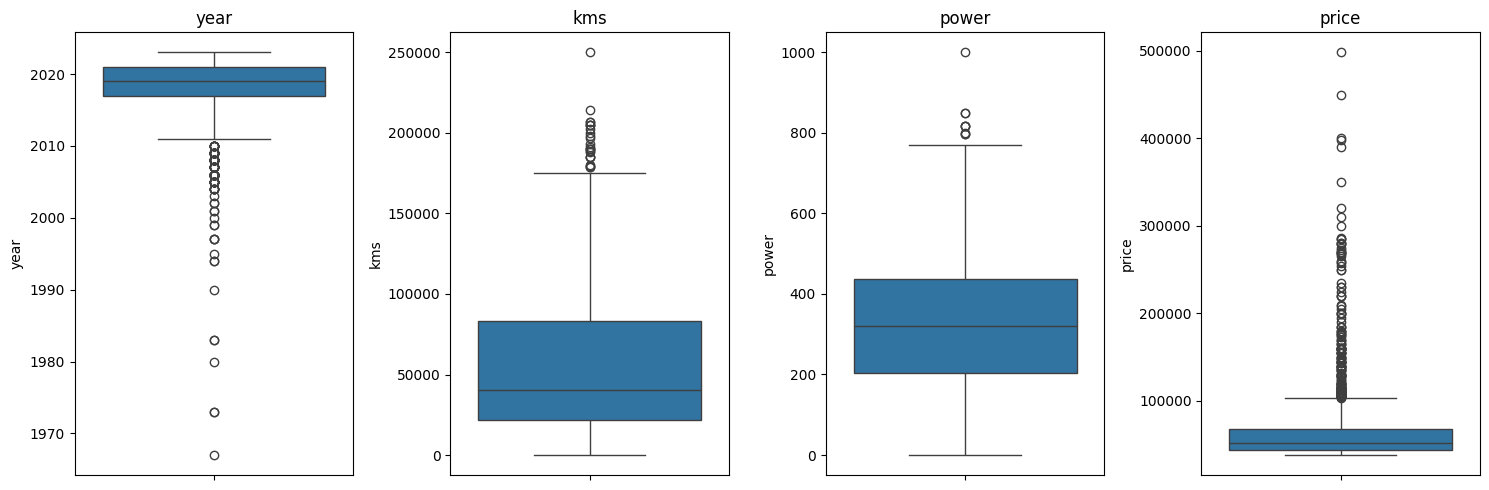

In [14]:
# Excluir la variable 'dealer_zip_code'
num_vars = outliers_df.select_dtypes(include=['float64', 'int64']).columns.drop('dealer_zip_code')

# Configurar la figura y los subplots
n_cols = 4  # Número de columnas en la cuadrícula
n_rows = 1  # Número de filas en la cuadrícula

plt.figure(figsize=(15, n_rows * 5))  # Ajustar el tamaño de la figura

# Iterar sobre las variables numéricas
for i, var in enumerate(num_vars):
    plt.subplot(n_rows, n_cols, i + 1)  # Crear un subplot
    sns.boxplot(y=outliers_df[var])  # Crear el boxplot para la variable
    plt.title(var)  # Título del gráfico
    plt.xlabel('')  # Quitar etiqueta del eje x para claridad

plt.tight_layout()  # Ajustar diseño
plt.show()

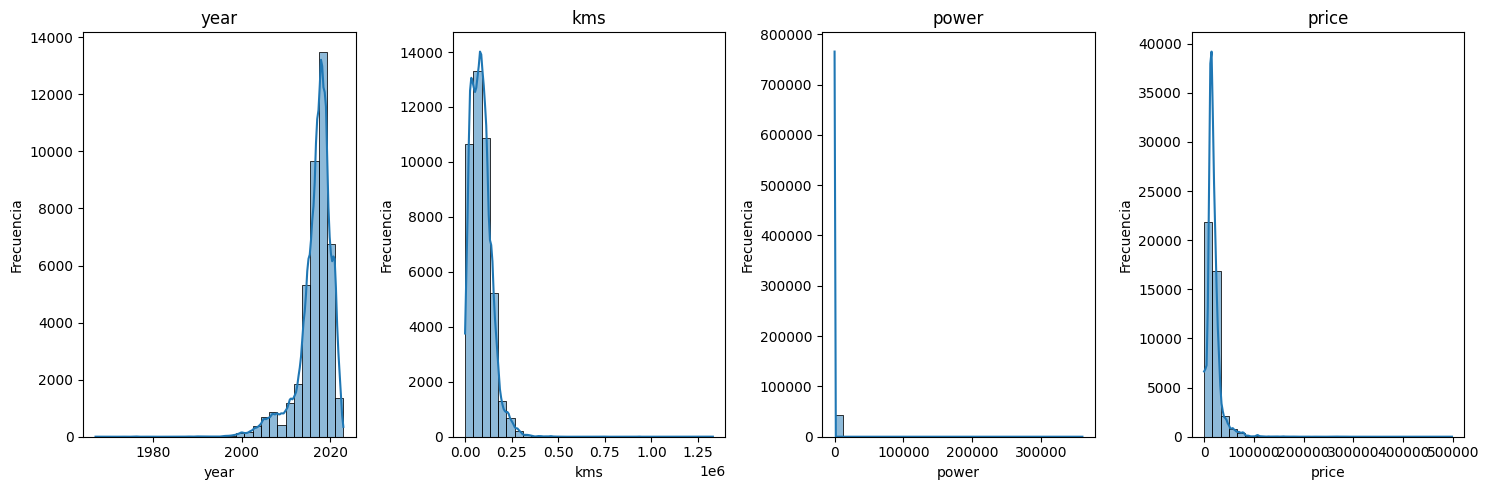

In [12]:
num_vars = df.select_dtypes(include=['float64', 'int64']).columns.drop('dealer_zip_code')

# Configurar la figura y los subplots
n_cols = 4  # Número de columnas en la cuadrícula
n_rows = 1  # Número de filas en la cuadrícula

plt.figure(figsize=(15, n_rows * 5))  # Ajustar el tamaño de la figura

# Iterar sobre las variables numéricas
for i, var in enumerate(num_vars):
    plt.subplot(n_rows, n_cols, i + 1)  # Crear un subplot
    sns.histplot(df[var], kde=True, bins=30)  # Crear histograma con KDE
    plt.title(var)  # Título del gráfico
    plt.xlabel(var)  # Etiqueta del eje x
    plt.ylabel('Frecuencia')  # Etiqueta del eje y

plt.tight_layout()  # Ajustar diseño
plt.show()